In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *   #    * = all 

In [2]:
y = np.array([1, 2])
y_pred = np.array([5, 2])
print('MAE mean absolut error = ', mean_absolute_error(y, y_pred))  # moyenne de la somme des valeurs absolue des erreurs UTILE
print('MSE mean squared error = ', mean_squared_error(y, y_pred))   # ne signifie rien, utile pour comprendre RSME  INUTILE
print('RMSE root mean squared error = ', np.sqrt(mean_squared_error(y, y_pred)))  # racine de la somme des carrés des erreurs UTILE

MAE mean absolut error =  2.0
MSE mean squared error =  8.0
RMSE root mean squared error =  2.8284271247461903


## 1 - Métrics_error et pb des valeurs aberrantes

In [3]:
y = np.array([1, 2, 2, 3, 5, 2])
y_pred = np.array([5, 2, 2, 5, 7, 1000])  # 1 valeur aberrantes ici = 1000 ( prédite ou vraie peu importe
print('MAE mean absolut error = ', mean_absolute_error(y, y_pred))  # moyenne de la somme des valeurs absolue des erreurs UTILE
print('MSE mean squared error = ', mean_squared_error(y, y_pred))   # ne signifie rien, utile pour comprendre RSME  INUTILE
print('RMSE root mean squared error = ', np.sqrt(mean_squared_error(y, y_pred)))  # racine de la somme des carrés des erreurs UTILE
print('mediane median absolut error = ', median_absolute_error(y, y_pred))

MAE mean absolut error =  167.66666666666666
MSE mean squared error =  166004.66666666666
RMSE root mean squared error =  407.43670265044443
mediane median absolut error =  2.0


In [4]:
# erreur_abs=[4, 0, 0, 2, 2, 998] => dans l'ordre [0, 0, 2, 2, 4, 98] 6 valeurs donc mediane = (2+2)/2 = 2

## 2 - quels calculs d'erreurs utiliser ? RMAE, MSE, medianSE, ou autres...=> tout utiliser et faire histogramme des erreurs

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [7]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

## 3 - Faire un histogramme d'erreur 

(array([10., 11.,  5., 10., 10.,  5.,  5.,  6.,  7.,  1.,  5.,  3.,  4.,
         4.,  6.,  5.,  4.,  5.,  1.,  1.,  5.,  3.,  2.,  2.,  3.,  3.,
         3.,  2.,  1.,  1.,  0.,  0.,  2.,  3.,  3.,  2.,  0.,  1.,  0.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([0.0005961 , 0.0124271 , 0.02425811, 0.03608911, 0.04792011,
        0.05975111, 0.07158211, 0.08341311, 0.09524412, 0.10707512,
        0.11890612, 0.13073712, 0.14256812, 0.15439912, 0.16623012,
        0.17806113, 0.18989213, 0.20172313, 0.21355413, 0.22538513,
        0.23721613, 0.24904714, 0.26087814, 0.27270914, 0.28454014,
        0.29637114, 0.30820214, 0.32003314, 0.33186415, 0.34369515,
        0.35552615, 0.36735715, 0.37918815, 0.39101915, 0.40285016,
        0.41468116, 0.42651216, 0.43834316, 0.45017416, 0.46200516,
        0.47383616, 0.48566717, 0.49749817, 0.50932917, 0.52116017,
        0.53299117, 0.54482217, 0.55665318, 0.56848418, 0.58031518,
        0.59214618]),
 <BarContainer

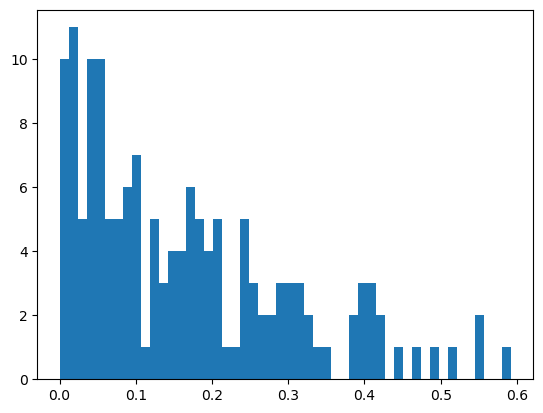

In [8]:
err_hist = np.abs(y-y_pred)  # on choisit une estimation d'erreur de base = valeur absolu ( y - y_pred )
plt.hist(err_hist, bins=50)   # on en fait l'histogramme des erreur

In [9]:
# et on voit que la + part des erreur sont entre 0% et 10% ( 0 à 0.1)
# 10 valeurs à 0% d'erreurs, 11 valeurs ensuite, puis 5 proche de 0% d'erreur
# on peut calculer la quantité d'erreur sous 10% par exemple
sum(err_hist<0.1) # -> 64 valeurs( sur 150 ) sous les 10% d'erreurs
sum(err_hist<0.2) # -> 100 valeurs( sur 150 ) sous les 20% d'erreurs
# GENERALEMENT ON A TOUJOURS UN HISTOGRAMME D ERREURS EN EXPONENTIELLE DECROISSANTE
sum(err_hist<0.6)

150

(array([56., 14.,  8.,  8.,  9.,  9.,  3.,  1.,  5.,  4.,  1.,  5.,  2.,
         2.,  2.,  2.,  1.,  1.,  0.,  0.,  2.,  0.,  3.,  2.,  2.,  1.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.55338950e-07, 7.01309021e-03, 1.40258251e-02, 2.10385600e-02,
        2.80512948e-02, 3.50640297e-02, 4.20767646e-02, 4.90894995e-02,
        5.61022343e-02, 6.31149692e-02, 7.01277041e-02, 7.71404389e-02,
        8.41531738e-02, 9.11659087e-02, 9.81786436e-02, 1.05191378e-01,
        1.12204113e-01, 1.19216848e-01, 1.26229583e-01, 1.33242318e-01,
        1.40255053e-01, 1.47267788e-01, 1.54280523e-01, 1.61293257e-01,
        1.68305992e-01, 1.75318727e-01, 1.82331462e-01, 1.89344197e-01,
        1.96356932e-01, 2.03369667e-01, 2.10382402e-01, 2.17395136e-01,
        2.24407871e-01, 2.31420606e-01, 2.38433341e-01, 2.45446076e-01,
        2.52458811e-01, 2.59471546e-01, 2.66484281e-01, 2.73497015e-

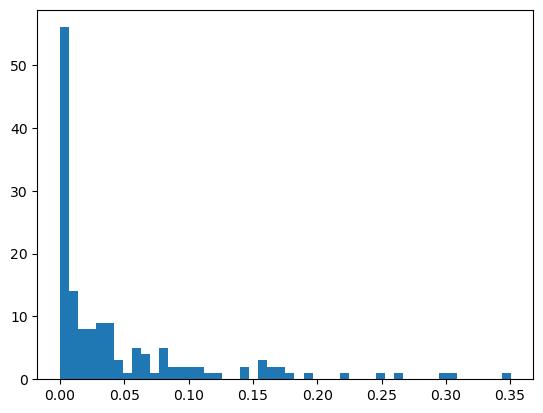

In [10]:
err_hist = ((y-y_pred)*(y-y_pred))  # on choisit une estimation d'erreur RACINE DE MSE = RMSE
plt.hist(err_hist, bins=50)   # on en fait l'histogramme des erreur

In [11]:
# encore plus de valeurs avec peu d'erreurs par la methode Squared_error
sum(err_hist<0.1) # -> 128 valeurs( sur 150 ) sous les 10% d'erreurs

128

### COEFFICIENT DE DETERMINATION R2 = model décrit R² % des variation de y

In [12]:
print(model.score(X, y))   # coef de détermination R2 -> 0.93
# signifit que le modele décrit 93% des variations de nos données
### TOUS LES MODELS DE REGRESSION CALCULENT LE R2 AVEC SCORE(X,y) 

0.9303939218549564


## Métrics dans une cross validation

In [13]:
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())  # donne toutes les metrics utilisables dnas un scoring de cross validation

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [14]:
model.score(X, y) # donne le R²

0.9303939218549564

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_absolute_error')

array([-0.72462151, -0.37644262, -0.60723884])